# Data Cleaning

With Siri's equation, we know that there exist a linear relationship between BODYFAT and DENSITY, which writes as $Percentage of Body Fat = 495/Body Density-450$. So we draw the plot to compare the BODYFAT calculated by DENSITY with the real value.

In [45]:
library(ggplot2)
require(ggplot2)
library(dplyr)

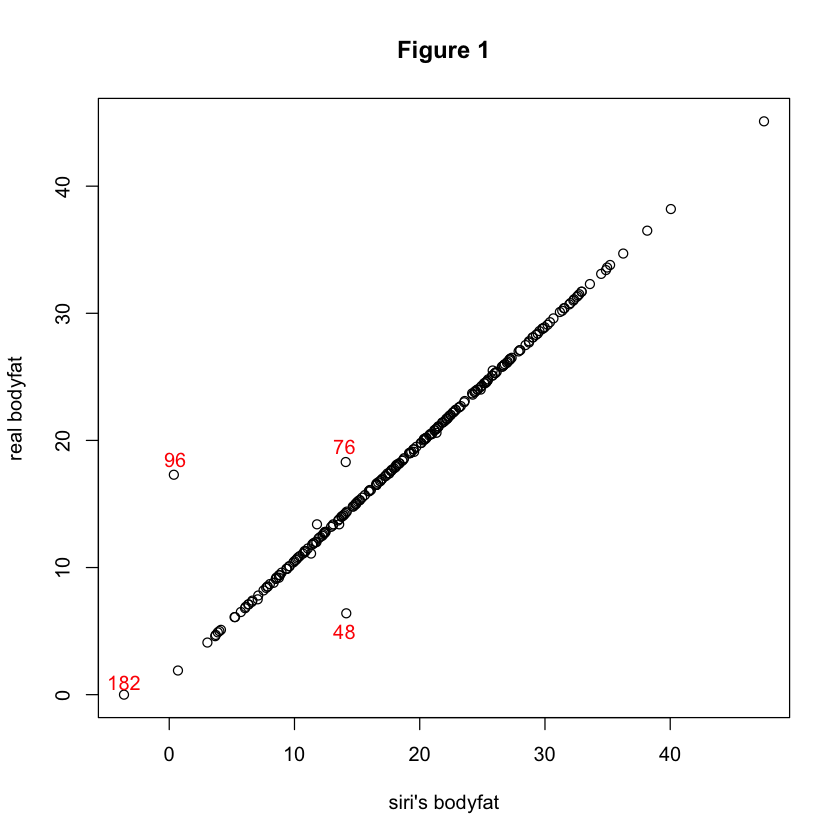

In [46]:
setwd("~/Desktop/628")
bodyfat=read.csv("BodyFat.csv")
siri=495/bodyfat$DENSITY-450
plot(bodyfat$BODYFAT ~ siri, ylab = "real bodyfat", xlab = "siri's bodyfat", main = "Figure 1")
text(-3.6,1,"182",col = "red",);text(0.5,18.5,"96",col = "red");text(14,19.5,"76",col = "red");text(14,5,"48",col = "red")

From the plot, we can find four outliers 48, 76, 96, 182, so we are going to look into the whole data in order to decide whether to delete these points.

In [47]:
# Look at outliers to see if they should be deleted
bodyfat[c(48, 76, 96, 182),]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


**48**: the BODYFAT calculated by DENSITY is 14.1%, but 6.4% seems to be an acceptable value which means there may have some measurement errors, so we just keep this BODYFAT value.  
**76**: the BODYFAT calculated by DENSITY is 14.1%, but 18.3% seems to be an acceptable value which means there may have some measurement errors, so we just keep this BODYFAT value.  
**96**: the BODYFAT calculated by DENSITY is 0.4%, which is impossible for a normal person, but we can see that other measurements are normal. So we think that the value of the DENSITY maybe wrongly recorded, we decide to keep the original BODYFAT value.  
**182**: the BODYFAT calculated by density is -3.6%, which is impossible to be negative, so the value of both the BODYFAT and DENSITY must be wrong. Then we try to use the other data to impute the BODYFAT value. Firstly we check the correctness of ADIPOSITY, HEIGHT and WEIGHT by using the equation $ADIPOSITY = 703\cdot WEIGHT(lbs)/HEIGHT^2(inches^2) = 703\cdot 118.5/68^2 = 18.02$, which is approximately equal to 18.1. So we conclude that the value of ADIPOSITY, HEIGHT and WEIGHT are true. Next we use ADIPOSITY to evaluate BODYFAT. Thus we try to find the relationship between BMI and bodyfat percentage, and we found fomula: $ Adult Body Fat\% =1.20\cdot BMI + 0.23\cdot AGE - 10.8\cdot SEX - 5.4$, for men, sex = 1. We can impute the value of $182^{th}$ BODYFAT by using this formula, which is 14.7%.

In [48]:
# Replace 182th data's bodyfat with 14.7%
bodyfat[182, 1] <- 14.7

The second step we use to check the data is using the boxplot.

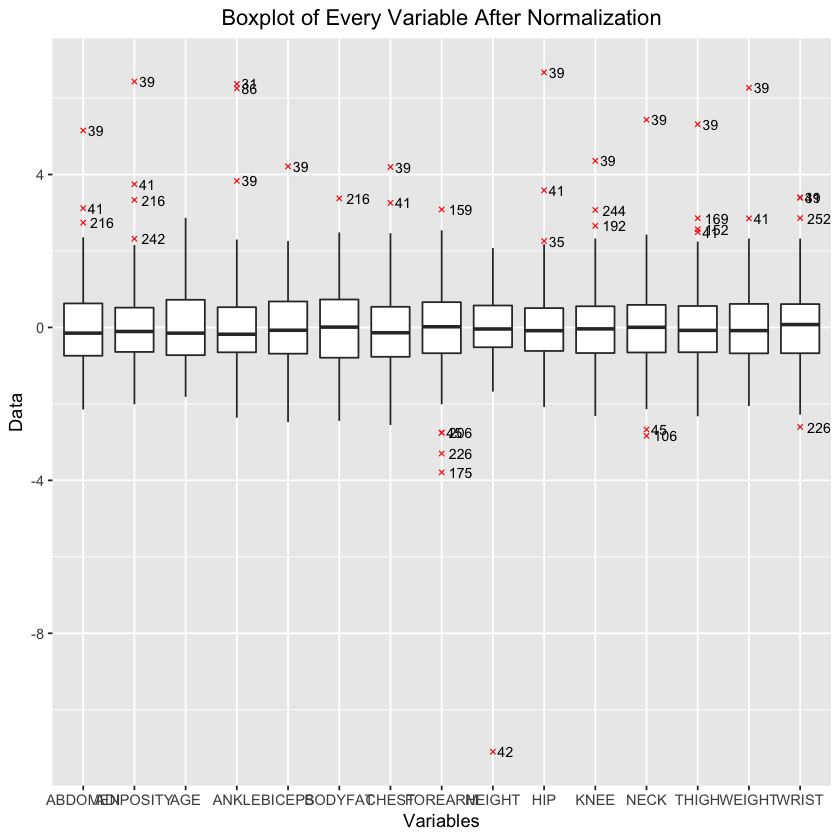

In [49]:
# boxplot
data <- read.csv("BodyFat.csv")
data_reshape <- scale(data$BODYFAT, center = T, scale = T)
cname <- colnames(data)[c(-1,-3)]
for (i in 4:(length(cname)+2)) {
  data_reshape <- c(data_reshape, scale(data[,i], center = T, scale = T))
}
data_2 <- data.frame(data = data_reshape, variable = rep(cname, each = nrow(data)), 
                     idno = rep(data$IDNO, length(cname)))
is_outlier <- function(x) {
  return(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x))
}
data_2 %>% 
  group_by(variable) %>%
  mutate(outlier = ifelse(is_outlier(data), idno, as.numeric(NA))) %>%
  ggplot(., aes(x = variable, y = data)) + 
  geom_boxplot(outlier.color = "red", outlier.size = 1, outlier.shape = 4) + 
  geom_text(aes(label = outlier), na.rm = TRUE, hjust = -0.3, size = 3) +
  labs(title = "Boxplot of Every Variable After Normalization", x = "Variables", y = "Data") +
  theme(plot.title = element_text(hjust = 0.5))

After plotting the boxplot, we found two abnormal points 39 and 42.

In [50]:
bodyfat[c(39, 42),]

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
39,39,33.8,1.0202,46,363.15,72.25,48.9,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


**39**: The man weights 363 pounds, which is extremely high. It is not significant to include the data in the reserch. So this data should be deleted.  
**42**: The HEIGHT of this man is only 29.5 inches, but other measurements are normal. So we decide to use the BMI formula to impute the value. The imputed value of HEIGHT is 67.43.  

In [51]:
bodyfat$HEIGHT[42] <- 67.43
dataset = bodyfat[-39,]